# Exercise 12.1

The aim of the exercise is to see how the accuracy and loss for validation and training data changes as a different optimizer is used in the model given. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [ ]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


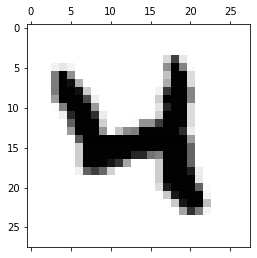

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

labels = np.array([0, 2, 1, 2, 0])
keras.utils.to_categorical(labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [ ]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model

# training parameters
batch_size = 32
epochs = 10

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6290 - accuracy: 0.8139 - val_loss: 0.1661 - val_accuracy: 0.9499
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1556 - accuracy: 0.9560 - val_loss: 0.0970 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.0828 - val_accuracy: 0.9737
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0952 - accuracy: 0.9728 - val_loss: 0.0754 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0806 - accuracy: 0.9765 - val_loss: 0.0689 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0725 - accuracy: 0.9792 - val_loss: 0.0655 - val_accuracy:


Test loss: 0.05968596786260605
Test accuracy: 0.9815999865531921

Train loss: 0.024020252749323845
Train accuracy: 0.9935333132743835


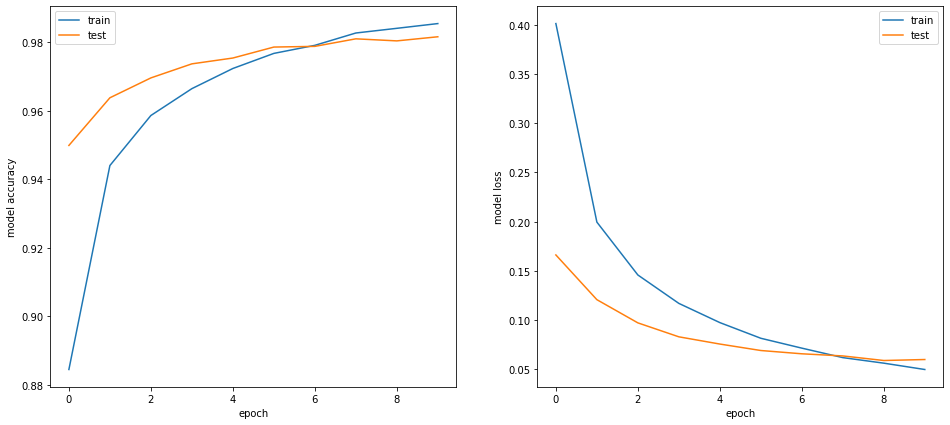

In [ ]:
# evaluate model
score_test = model_DNN.evaluate(X_test, Y_test, verbose=0)
score_train = model_DNN.evaluate(X_train, Y_train, verbose=0)
# print performance
print()
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])
print()
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])

# look into training history

fig=plt.figure(figsize=(16,7))

plt.subplot(121)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(122)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

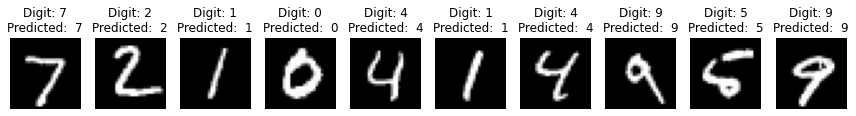

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:  {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

5 differen optimizers were used, all of which obtained over 96% of test accuracy when training for 10 epochs. SGD is the worst one of the optimizers tried here, until 15 epochs of training are used it doesn't even recognise all of the ten digits it's given. In the case of the RMSprop optimizer there might be overfitting, as the test accuracy is lower and the test loss higher with 10 epochs compared to 5. The most accurate optimizer on this dataset, with this model, is ADAM followed by the NADAM.


**SGD**

5 epochs: 
- Recognizes 9 of the 10 given digits
- Test loss: 0.1572829782962799
- Test accuracy: 0.949999988079071

10 epochs: 
- Recognizes 9 of the 10 given digits
- Test loss: 0.1088804230093956
- Test accuracy: 0.9653000235557556
- Train loss: 0.09613869339227676
- Train accuracy: 0.9711666703224182

15 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.08606171607971191
- Test accuracy: 0.972000002861023

**ADAM**

5 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.07598961889743805
- Test accuracy: 0.9785000085830688

10 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.08209969103336334
- Test accuracy: 0.9818999767303467
- Train loss: 0.013760062865912914
- Train accuracy: 0.9955999851226807

**ADAMAX**

5 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.07542576640844345
- Test accuracy: 0.9753999710083008

10 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.05968596786260605
- Test accuracy: 0.9815999865531921 
- Train loss: 0.024020252749323845
- Train accuracy: 0.9935333132743835

**RMSprop**

5 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.1672402322292328
- Test accuracy: 0.9736999869346619

10 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.21654237806797028
- Test accuracy: 0.9724000096321106
- Train loss: 0.06848429888486862
- Train accuracy: 0.9863666892051697



**NADAM**

5 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.07869566977024078
- Test accuracy: 0.9779999852180481

10 epochs: 
- Recognizes all of the 10 given digits
- Test loss: 0.0964023619890213
- Test accuracy: 0.9818999767303467
- Train loss: 0.012403346598148346
- Train accuracy: 0.9957333207130432



# Exercise 12.2

In this exercise convolution layers were added to the model, and the performance was evaluated. First many different CNN were tested, with different geometries and optimizers: the best optimezer was found to be NADAM, and the result obtained using it for four different models are shown at the bottom (only the efficiencies are reported). Then three different CNN models inspired by those found before are shown here: a simple one with only one convolution layer and one pooling; a more complicated one with two convolution layers, two poolings and the dropout option enabled; a third one which differs from the second on the activation function, using tanh and not relu. The choice of relu and tanh is due to them being the most common choices in the literature.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [ ]:
# very simple first model
def create_CNN1():
    model = Sequential()
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
    return model
#more complicated second model, with 2 convolution layers
def create_CNN2():
    model = Sequential()
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softplus'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
    return model

#third model, identical if not for the activation (tanh instead of relu)
def create_CNN3():
    model = Sequential()
    model.add(Conv2D(5, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softplus'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Nadam',
                  metrics=['accuracy'])
    return model


In [ ]:
batch_size = 32
epochs = 10

model1=create_CNN1()
model2=create_CNN2()
model3=create_CNN3()

history1=model1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test))
history2=model2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test))
history3=model3.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(X_test, Y_test))


CNN 1
Test loss: 0.054128699004650116
Test accuracy: 0.9825999736785889
Train loss: 0.034693505614995956
Train accuracy: 0.9894999861717224
CNN 2
Test loss: 0.03614985570311546
Test accuracy: 0.988099992275238
Train loss: 0.03370854631066322
Train accuracy: 0.9896000027656555
CNN 3
Test loss: 0.037190571427345276
Test accuracy: 0.9883000254631042
Train loss: 0.03262881934642792
Train accuracy: 0.9897000193595886


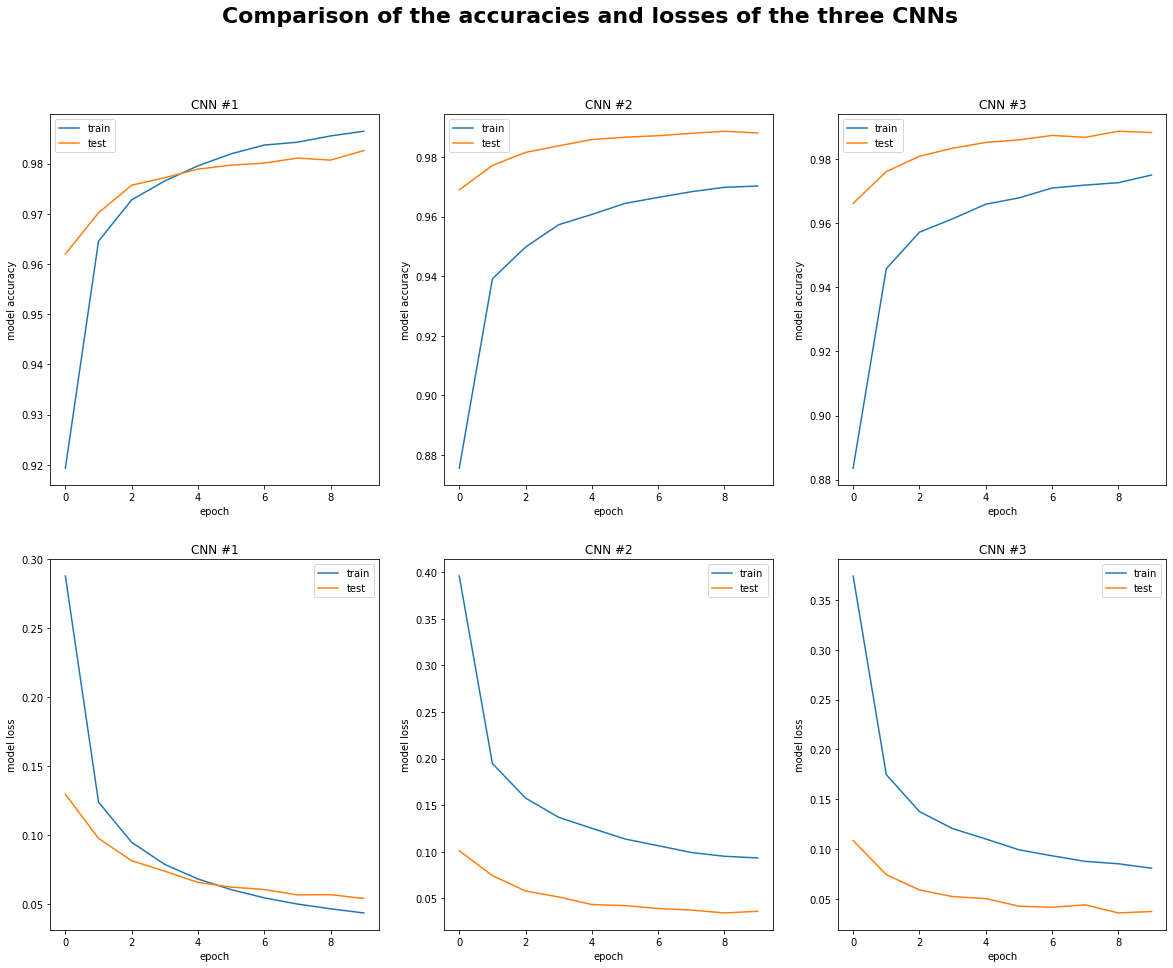

In [ ]:
score10 = model1.evaluate(X_train, Y_train, verbose=0)
score11 = model1.evaluate(X_test, Y_test, verbose=0)
print('CNN 1')
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])
print('Train loss:', score10[0])
print('Train accuracy:', score10[1])

score20 = model2.evaluate(X_train, Y_train, verbose=0)
score21 = model2.evaluate(X_test, Y_test, verbose=0)
print('CNN 2')
print('Test loss:', score21[0])
print('Test accuracy:', score21[1])
print('Train loss:', score20[0])
print('Train accuracy:', score20[1])

score30 = model3.evaluate(X_train, Y_train, verbose=0)
score31 = model3.evaluate(X_test, Y_test, verbose=0)
print('CNN 3')
print('Test loss:', score31[0])
print('Test accuracy:', score31[1])
print('Train loss:', score30[0])
print('Train accuracy:', score30[1])

fig=plt.figure(figsize=(20,15))
fig.suptitle("Comparison of the accuracies and losses of the three CNNs", fontweight = "bold", fontsize = 22)

plt.subplot(231)

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("CNN #1")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(232)

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("CNN #2")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(233)

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("CNN #3")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')


plt.subplot(234)


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("CNN #1")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(235)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("CNN #2")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(236)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("CNN #3")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')






plt.show()


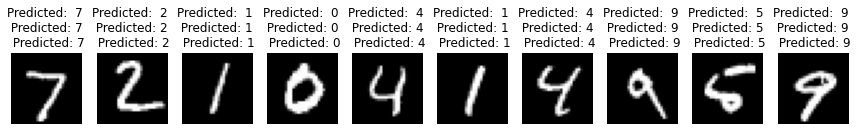

In [ ]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Predicted:  {}".format(np.argmax(predictions1[i])) + " \n Predicted: {}".format(np.argmax(predictions2[i]) ) + " \n Predicted: {}".format(np.argmax(predictions3[i]) ))    
    plt.axis('off') 
plt.show()

Here are the accuracies of four models with different levels of complexity: the first one is the same as the simpler one used in the exercise, CNN1. The last one, which is more complex and was the most accurate, is the second used in the exercise (CNN2). The graphs above are relative to the 3 CNN models described at the beginning of the exercise, and from their accuracies there doesn't seem to be a marked difference amongst them.

**NADAM**

10 epochs    

```
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
```



Test loss: 0.05023961886763573

Test accuracy: 0.9872000217437744

!0/10 predicted

**NADAM**

10 epochs    

```
    model.add(Conv2D(20, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
```



Test loss: 0.028795702382922173

Test accuracy: 0.9907000064849854

!0/10 predicted


**NADAM**

10 epochs    

```
    model.add(Conv2D(5, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))
```

Test loss: 0.04379381239414215

Test accuracy: 0.9854000210762024

!0/10 predicted

**NADAM**

10 epochs    

```
    model.add(Conv2D(5, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='softplus'))
    model.add(Dense(10, activation='softmax'))
    
```

Test loss: 0.033339254558086395

Test accuracy: 0.9890999794006348

10/10 predicted


# Exercise 12.3

The three CNNs from before are now put under another test: recognizing 9 digits which were handwritten by me. 

In [ ]:
# TO LOAD FILES ON GOOGLE COLAB
from google.colab import files
upload = files.upload() #this will let you browse and choose the file to be uploaded

Saving 0.png to 0.png
Saving 1.png to 1.png
Saving 2.png to 2.png
Saving 3.png to 3.png
Saving 4.png to 4.png
Saving 5.png to 5.png
Saving 6.png to 6.png
Saving 7.png to 7.png
Saving 8.png to 8.png
Saving 9.png to 9.png


In [ ]:
from PIL import Image
import os
digits = []
for file in upload:
    digit_in = Image.open(file).convert('L') #ON GOOGLE COLAB INSERT THE NAME OF THE UPLOADED FILE
    digits.append(digit_in)

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

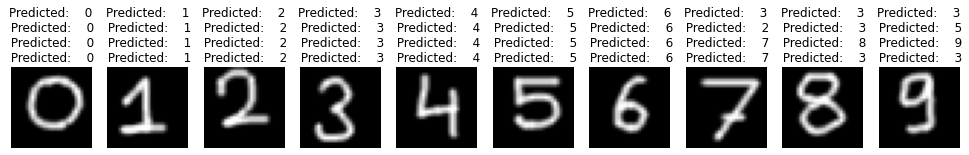

In [ ]:
fig=plt.figure(figsize=(17, 8))

for z in range(10):

    pix=digits[z].load();
    data = np.zeros((28, 28))
    for j in range(28):
        for i in range(28):
            data[i,j]=pix[j,i]
    data /= 255

    data = data.reshape(1,xdim*ydim)
    pred_0 = model_DNN.predict(data)

    data = data.reshape(1, 28, 28, 1)

    pred_1 = model1.predict(data)
    pred_2 = model2.predict(data)
    pred_3 = model3.predict(data)

    data = data.reshape(xdim,ydim)

    ax = plt.subplot(2, 10, z + 1)    
    plt.imshow(data, cmap='gray')    
    plt.title("Predicted:    {}".format(np.argmax(pred_0)) + "\n Predicted:    {}".format(np.argmax(pred_1)) + "\n Predicted:    {}".format(np.argmax(pred_2)) +  "\n Predicted:    {}".format(np.argmax(pred_3)))
    plt.axis('off') 
plt.show()


The first line shows the predictions made by the DNN: it fails to recognize any digit after 6, therefore guessing 7/10. 

The second line shows the predictions made by the simpler CNN: it guesses the same amount of digits as the DNN, despite having far fewer nodes.

In the third line are those made by the more complicated CNN which uses the RELU activation: it guesses correctly all of them.

The last one is related to the last CNN, which has the same structure but a different activation (it uses TANH): it guesses 8/10 correctly.

It is interesting to note that the three CNNs scored similarly on the tests performed on the given database, but the results they obtained in this situation are quite different: it goes to show that one can only know how a NN will perform on the situation it already tested, but as soon as the data it is given is outside their training regime they may behave very differently. Even similarly performing NNs on one database aren't guaranteed to perform similarly on a different one.